In [31]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [32]:
#K nearest neighbour 

In [33]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.shape

(150, 6)

In [35]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [37]:
df.drop(columns='Id',axis=1,inplace=True)

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

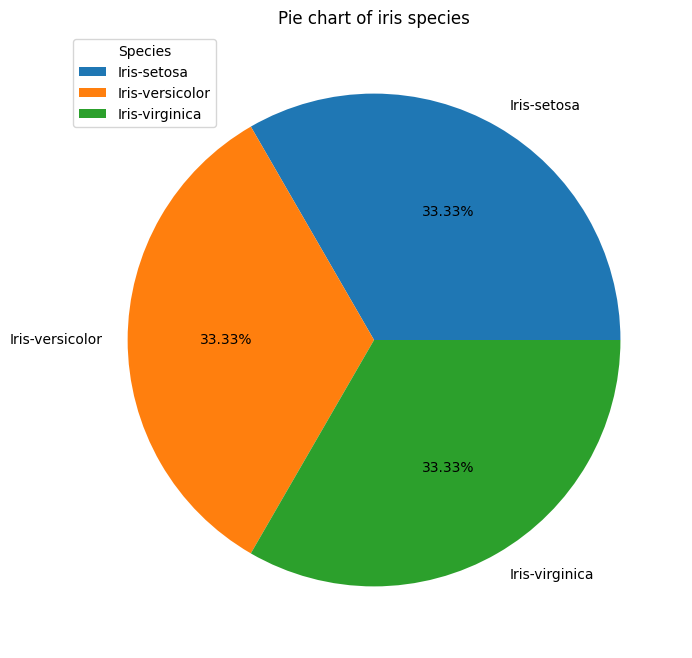

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df['Species'].value_counts(),labels=df['Species'].value_counts().index,autopct='%.2f%%')
plt.title('Pie chart of iris species')

plt.legend(labels=df['Species'].value_counts().index,title='Species',loc='upper left')
plt.show()

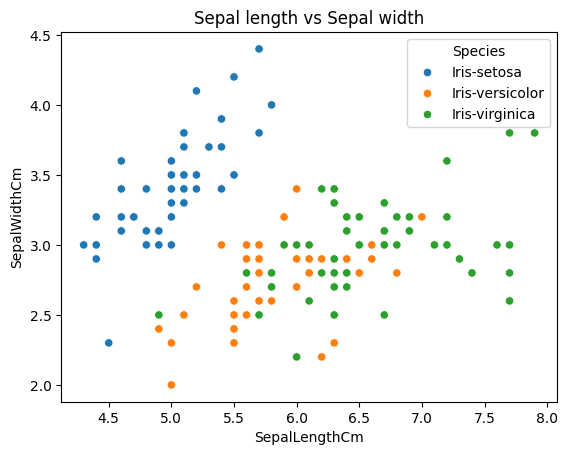

In [44]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species')
plt.title("Sepal length vs Sepal width")
plt.show()

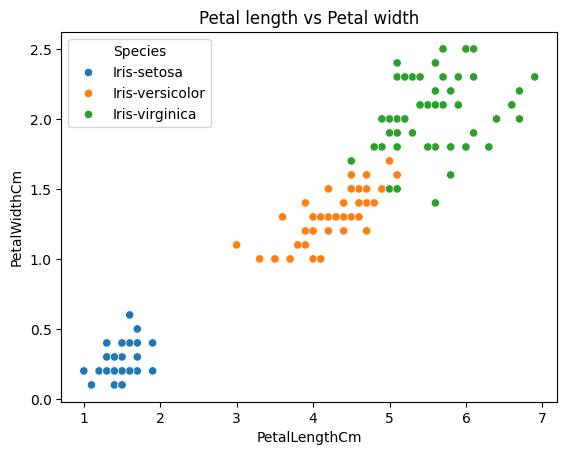

In [46]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')
plt.title("Petal length vs Petal width")
plt.show()

<Axes: >

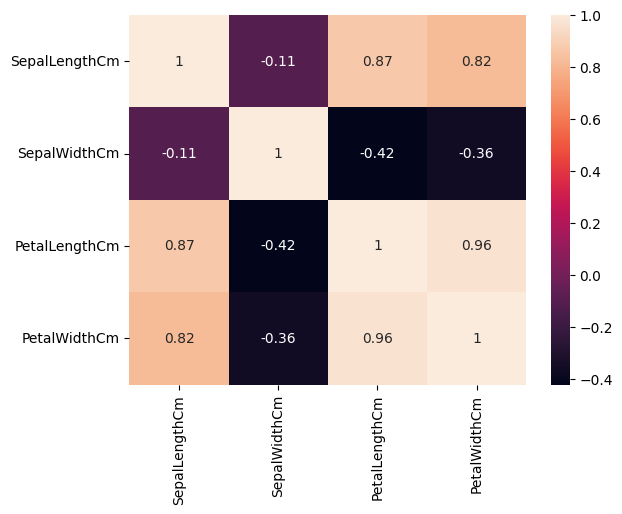

In [53]:
n_df=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
sns.heatmap(n_df.corr(),annot=True)

In [54]:
x=df.drop(['Species'],axis=1)
y=df['Species']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

y_t=list(y_test)
error_rates=[]
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)

    sum=0
    score=[]
    for j in range(0,len(y_t)):
        if pred[j] == y_t[j]:
            score.append(0)
        else:
            score.append(1)

    for m in score:
        if m == 1:
            sum=sum+m

    error_rates.append(sum/len(score))

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# error_rates = []

# for k in range(1, 41):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(x_train, y_train)
#     pred = knn.predict(x_test)
    
#     error = 1 - accuracy_score(y_test, pred)
#     error_rates.append(error)


Minimum error:  0.0 at K =  39


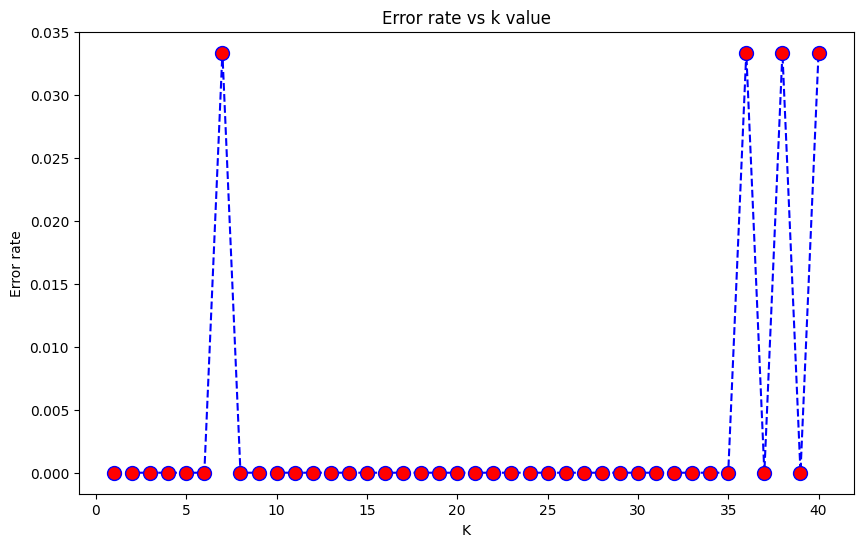

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rates,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs k value")
plt.xlabel("K")
plt.ylabel("Error rate")
rev_error_rates=error_rates[::-1]
req_k_value=len(rev_error_rates)-rev_error_rates.index(min(error_rates))
print("Minimum error: ",min(error_rates),'at K = ',req_k_value)

In [63]:
knn=KNeighborsClassifier(n_neighbors=39)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)

print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<Axes: >

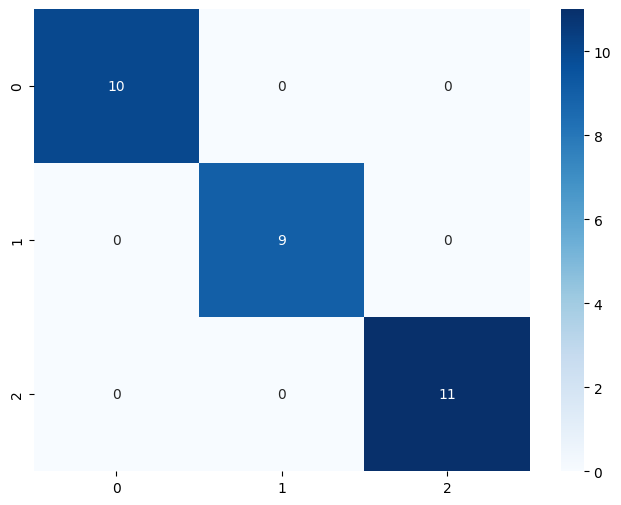

In [65]:
from sklearn.metrics import confusion_matrix

cm_model=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_model,annot=True,cmap='Blues')